In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_titanic = pd.read_csv('./titanic/train.csv')

In [6]:
df_titanic.head(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_titanic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Exploratory Data Analysis**

In [8]:
df_titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
df_titanic['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64

<Axes: ylabel='Frequency'>

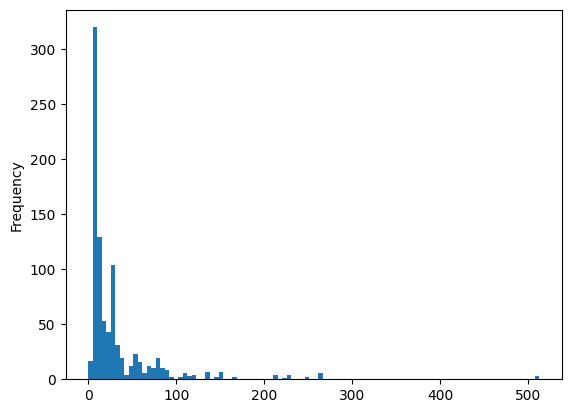

In [16]:
df_titanic['Fare'].plot(kind='hist', bins=100) 
# Lots of low fare paseengers --- many of 3rd class and many single passengers may be!!!

<Axes: xlabel='Pclass', ylabel='count'>

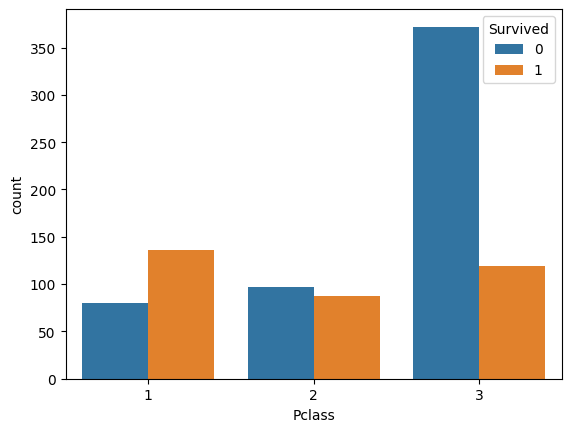

In [17]:
sns.countplot(data=df_titanic, x='Pclass', hue='Survived')
# Lots of survivors in Class 1 and 2 relatively 

<Axes: xlabel='Pclass', ylabel='Age'>

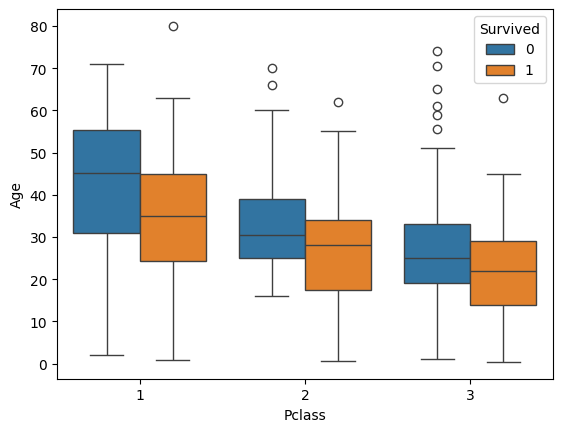

In [29]:
sns.boxplot(data=df_titanic, x='Pclass', y='Age', hue='Survived')
# The median age of those who survived wAS lower than those who did not across all passenger classes
# Many outliers in non survived class 3, indicating many older people in class 3 perished, one unusual survivor !!!

<Axes: xlabel='Pclass', ylabel='Fare'>

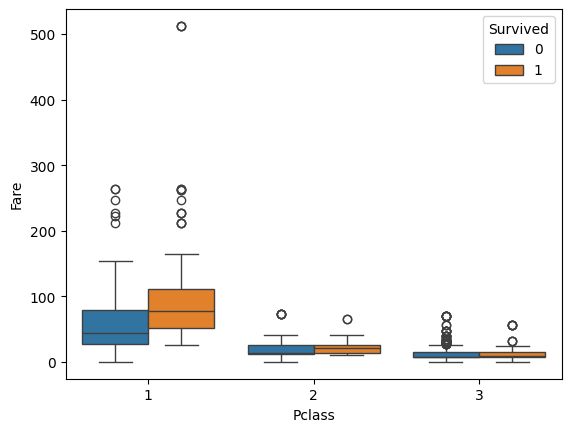

In [31]:
sns.boxplot(data=df_titanic, x='Pclass', y='Fare', hue='Survived')
# Many outliers with high fare in class 1 and class 3 --- need to investiage further

<Axes: xlabel='Sex', ylabel='count'>

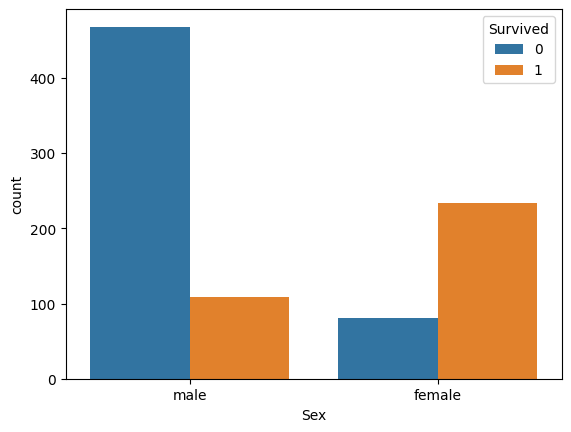

In [35]:
sns.countplot(data=df_titanic, x='Sex', hue='Survived')
#generally more females survived than males and survival ratio of females is more than 1

**Summary of EDA**  
1. Females have higher survival rates than males.  
2. Females are likely to survive more than perish -- > 1 ratio of survived / perished.  
3. First class passengers likely to survive more --- probably due to prefernce in gettnig life boats and jackets.  
4. Among the first class passengers, there is slightly higher lilelihood for survival than persishing again based on the ratio.  
5. In third class there is higher likelihood of perishing than survival again based on ratio. 



<Axes: xlabel='Parch', ylabel='count'>

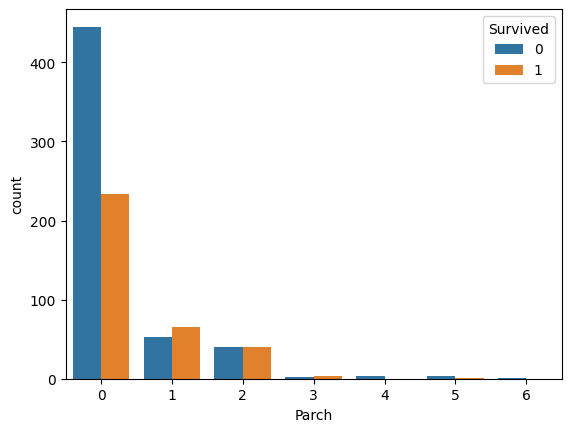

In [38]:
sns.countplot(data=df_titanic, x='Parch', hue='Survived')
#Those with Parch = 0 had higher perished rates than those with Parch >= 1. Also their survived ratio was less than 1

<Axes: xlabel='SibSp', ylabel='count'>

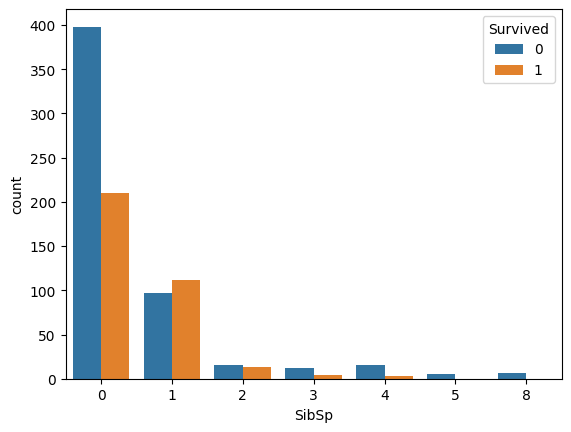

In [41]:
sns.countplot(data=df_titanic, x='SibSp', hue='Survived')
#Those with SibSp = 0 had higher perished rates than those with SibSp >= 1. Also their survived ratio was less than 1

**Summary of EDA**

1. Females have higher survival rates than males.
2. Females are likely to survive more than perish -- > 1 ratio of survived / perished.
3. First class passengers likely to survive more --- probably due to prefernce in gettnig life boats and jackets.
4. Among the first class passengers, there is slightly higher lilelihood for survival than persishing again based on the ratio.
5. In third class there is higher likelihood of perishing than survival again based on ratio.  
6. Those who were travelling withoout family i.e. single i.e. had neither children nor parents or without spouse or siblings 
    were likley to perish more than those travelling with family.  

<Axes: xlabel='Embarked', ylabel='count'>

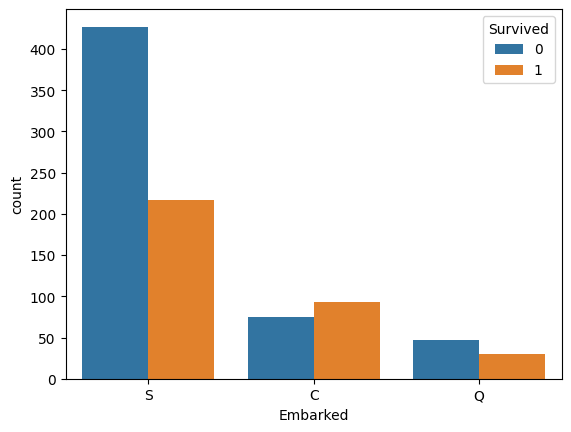

In [48]:
sns.countplot(data=df_titanic, x='Embarked', hue='Survived')

In [65]:
df_titanic[(df_titanic['SibSp'] > 0) | (df_titanic['Parch'] > 0)].groupby('Ticket').count()
#Trying to find the family groups by combining those whih SibSp > 0 and Parch > 0 and grouping by ticket
#There are some with count of passengerid = 1 meaning they were in same family but travelling on different tickets
#The survival count is same as count of passenger Ids
#This means for a family group there is a good chance that all will be rescued

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Ticket,,,,,,,,,,,
110413,3,3,3,3,3,3,3,3,3,3,3
110813,1,1,1,1,1,1,1,1,1,1,1
111361,2,2,2,2,2,2,2,2,2,2,2
113503,1,1,1,1,1,1,1,1,1,1,1
113505,2,2,2,2,2,1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
STON/O2. 3101279,2,2,2,2,2,2,2,2,2,0,2
W./C. 6607,2,2,2,2,2,0,2,2,2,0,2
W./C. 6608,4,4,4,4,4,4,4,4,4,0,4


**Summary of EDA**

1. Females have higher survival rates than males.
2. Females are likely to survive more than perish -- > 1 ratio of survived / perished.
3. First class passengers likely to survive more --- probably due to prefernce in gettnig life boats and jackets.
4. Among the first class passengers, there is slightly higher lilelihood for survival than persishing again based on the ratio.
5. In third class there is higher likelihood of perishing than survival again based on ratio.
6. Those who were travelling withoout family i.e. single i.e. had neither children nor parents or without spouse or siblings were likley to perish more than those travelling with family.
7. When members travel in a family there is a good chance that all of them will be rescued

**Feature Engineering**

In [67]:
df_titanic_eng = df_titanic.copy()

In [68]:
df_titanic_eng.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
df_titanic_eng['Single_Travel'] = (df_titanic_eng['SibSp'] == 0) & (df_titanic_eng['Parch'] == 0)

In [71]:
df_titanic_eng.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Single_Travel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [76]:
def get_last_name(fullname):
    names = str.split(fullname, ',')
    if len(names) > 0:
        return names[0]
    else:
        return ""

In [77]:
df_titanic_eng['Last_Name'] = df_titanic_eng['Name'].apply(get_last_name)

In [78]:
df_titanic_eng.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Single_Travel,Last_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,Allen


In [79]:
df_titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [83]:
df_titanic_eng['Cabin_Deck'] = df_titanic_eng['Cabin'].apply(lambda x : x[0] if pd.notnull(x) else np.nan)

In [84]:
df_titanic_eng.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Single_Travel,Last_Name,Cabin_Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Braund,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,Cumings,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,Heikkinen,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,Futrelle,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,Allen,NaN


<Axes: xlabel='Cabin_Deck', ylabel='count'>

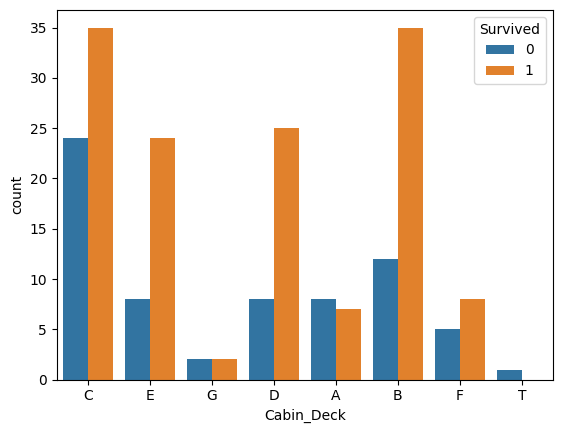

In [87]:
sns.countplot(data=df_titanic_eng, x='Cabin_Deck', hue='Survived')
#Belonging to Deck C has a higher percentage of perishing compared to others but since there are many NaN in the cabin data its not confirmed

In [100]:
df_titanic_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Single_Travel  891 non-null    bool   
 13  Last_Name      891 non-null    object 
 14  Cabin_Deck     204 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 98.5+ KB


In [107]:
#Fill Age with median of the age for each sex, passenger class 
titanic_median_ages = df_titanic_eng.groupby(['Sex','Pclass', 'Survived'])['Age'].median()

In [108]:
titanic_median_ages.head()

Sex     Pclass  Survived
female  1       0           25.0
                1           35.0
        2       0           32.5
                1           28.0
        3       0           22.0
Name: Age, dtype: float64

In [110]:
def fill_na_ages(row):
    if pd.isnull(row['Age']):
        return titanic_median_ages.loc[row['Sex'], row['Pclass'], row['Survived']]
    else:
        return row['Age']

In [111]:
df_titanic_eng['Age'] = df_titanic_eng.apply(fill_na_ages, axis=1)

In [113]:
df_titanic_eng.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Single_Travel,Last_Name,Cabin_Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Braund,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,Cumings,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,Heikkinen,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,Futrelle,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,Allen,NaN
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q,True,Moran,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True,McCarthy,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False,Palsson,NaN


In [114]:
df_titanic_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Single_Travel  891 non-null    bool   
 13  Last_Name      891 non-null    object 
 14  Cabin_Deck     204 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 98.5+ KB


In [116]:
df_titanic_eng['Cabin'].fillna("NA", inplace=True)

C:\Users\D8CTKCR\AppData\Local\Temp\ipykernel_17340\2725528106.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic_eng['Cabin'].fillna("NA", inplace=True)


In [117]:
df_titanic_eng['Cabin_Deck'].fillna("NA", inplace=True)

C:\Users\D8CTKCR\AppData\Local\Temp\ipykernel_17340\649781005.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic_eng['Cabin_Deck'].fillna("NA", inplace=True)


In [130]:
df_titanic_eng.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Single_Travel,Last_Name,Cabin_Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,False,Braund,NA
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,Cumings,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,True,Heikkinen,NA
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,Futrelle,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,True,Allen,NA


In [133]:
df_titanic_eng['Embarked'].fillna(df_titanic_eng['Embarked'].mode()[0], inplace=True)

In [142]:
df_titanic_eng.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Single_Travel,Last_Name,Cabin_Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,False,Braund,NA
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,Cumings,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,True,Heikkinen,NA
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,Futrelle,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,True,Allen,NA
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NA,Q,True,Moran,NA
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True,McCarthy,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NA,S,False,Palsson,NA


**Train Test Split**

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
X = df_titanic_eng.drop(['Survived', 'Name', 'Cabin', 'Ticket', 'Last_Name'], axis=1)

In [207]:
y = df_titanic_eng['Survived']

In [208]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Single_Travel,Cabin_Deck
0,1,3,male,22.0,1,0,7.2500,S,False,NA
1,2,1,female,38.0,1,0,71.2833,C,False,C
2,3,3,female,26.0,0,0,7.9250,S,True,NA
3,4,1,female,35.0,1,0,53.1000,S,False,C
4,5,3,male,35.0,0,0,8.0500,S,True,NA


In [209]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [210]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked', 'Single_Travel', 'Cabin_Deck'], drop_first=True, dtype=int)

In [211]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Single_Travel_True,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_NA,Cabin_Deck_T
0,1,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,0,0,1,0
1,2,1,38.0,1,0,71.2833,0,0,0,0,0,1,0,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,0,0,1,0
3,4,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0
4,5,3,35.0,0,0,8.0500,1,0,1,1,0,0,0,0,0,0,1,0


In [212]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100)

**Model Training using Logistic Regression, Decision Tree and K-NN**  
**Hyper Parameter tuning using GridSearchCV**  

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [214]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'SVM': SVC()
}

In [215]:
param_info = {
    'LogisticRegression' :
    {
        'C': [0.01, 0.1, 1, 10, 100],         # Regularization strength
        'penalty': ['l2'],                    # L2 regularization (most common)
        'solver': ['liblinear'],             # Works well with small datasets and supports L2
        'max_iter': [100, 500, 1000]         # Ensure convergence
    },
    'DecisionTree':
    {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'SVM':
    {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

In [216]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [220]:
best_models = []
for model_name, model in models.items():
    grid = GridSearchCV(model, param_info[model_name], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    print("_"*60)
    print(f'Best Params for model {model_name} are : {grid.best_params_}')
    best_models.append(grid.best_estimator_)
    y_pred = grid.best_estimator_.predict(X_val)
    print(f'Classification Report for model {model_name} is below :')
    print(classification_report(y_val, y_pred))
    print(f'Confusion Matrix for model {model_name} is below : ')
    print(confusion_matrix(y_val, y_pred))
    print("_"*60)

____________________________________________________________
Best Params for model LogisticRegression are : {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report for model LogisticRegression is below :
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       159
           1       0.80      0.70      0.75       109

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268

Confusion Matrix for model LogisticRegression is below : 
[[140  19]
 [ 33  76]]
____________________________________________________________
____________________________________________________________
Best Params for model DecisionTree are : {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Classification Report for model DecisionTree is below :
              precision    recall  f1-score   

**Apply Bagging (Bootstrap Aggregating) to the estimators with best params**

In [219]:
from sklearn.ensemble import BaggingClassifier

In [221]:
best_models

[LogisticRegression(C=10, solver='liblinear'),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                        min_samples_split=10),
 SVC(C=0.1, kernel='linear')]

In [223]:
#BAgging Classifiers
bagging_models = {
    'Bagging_LogisticRegression' : BaggingClassifier(estimator=best_models[0], n_estimators=100, random_state=100),
    'Bagging_DecitionTree' : BaggingClassifier(estimator=best_models[1], n_estimators=100, random_state=100),
    'Bagging_SVM' : BaggingClassifier(estimator=best_models[2], n_estimators=100, random_state=100)
}

In [224]:
for model_name, bag_model in bagging_models.items():
    bag_model.fit(X_train, y_train)
    y_predict = bag_model.predict(X_val)
    print("_"*60)
    print(f'Classification Report for model {model_name} is below :')
    print(classification_report(y_val, y_pred))
    print(f'Confusion Matrix for model {model_name} is below : ')
    print(confusion_matrix(y_val, y_pred))   
    print("_"*60)

____________________________________________________________
Classification Report for model Bagging_LogisticRegression is below :
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.77      0.66      0.71       109

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

Confusion Matrix for model Bagging_LogisticRegression is below : 
[[138  21]
 [ 37  72]]
____________________________________________________________
____________________________________________________________
Classification Report for model Bagging_DecitionTree is below :
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.77      0.66      0.71       109

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77      

**After doing GridSearchCV and finding the best hyperparameters and then again using Bagging Classifiers for the best estimators**  
**The accuracy is about 78% for bagging classifiers made using best Logitstic Regression Model, best Tree Classifier and best SVM classifier**  
**obtained from GridSearchCV**  

**Prediction on Test Data from the test data frame**

In [227]:
df_titanic_test = pd.read_csv('./titanic/test.csv')

In [228]:
df_titanic_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [229]:
df_titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [231]:
df_titanic_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [234]:
df_titanic_test_eng = df_titanic_test.copy()

In [236]:
titanic_test_median_ages = df_titanic_test_eng.groupby(['Sex','Pclass'])['Age'].median()

In [237]:
def fill_na_ages_test(row):
    if pd.isnull(row['Age']):
        return titanic_test_median_ages.loc[row['Sex'], row['Pclass']]
    else:
        return row['Age']

In [238]:
df_titanic_test_eng['Single_Travel'] = (df_titanic_test_eng['SibSp'] == 0) & (df_titanic_test_eng['Parch'] == 0)
df_titanic_test_eng['Last_Name'] = df_titanic_test_eng['Name'].apply(get_last_name)
df_titanic_test_eng['Cabin_Deck'] = df_titanic_test_eng['Cabin'].apply(lambda x : x[0] if pd.notnull(x) else np.nan)
df_titanic_test_eng['Age'] = df_titanic_test_eng.apply(fill_na_ages_test, axis=1)
df_titanic_test_eng['Cabin'].fillna("NA", inplace=True)
df_titanic_test_eng['Cabin_Deck'].fillna("NA", inplace=True)
df_titanic_test_eng['Embarked'].fillna(df_titanic_test_eng['Embarked'].mode()[0], inplace=True)

C:\Users\D8CTKCR\AppData\Local\Temp\ipykernel_17340\3880898755.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic_test_eng['Cabin'].fillna("NA", inplace=True)
C:\Users\D8CTKCR\AppData\Local\Temp\ipykernel_17340\3880898755.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [239]:
df_titanic_test_eng.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Single_Travel,Last_Name,Cabin_Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NA,Q,True,Kelly,NA
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NA,S,False,Wilkes,NA
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NA,Q,True,Myles,NA
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NA,S,True,Wirz,NA
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NA,S,False,Hirvonen,NA
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NA,S,True,Svensson,NA
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NA,Q,True,Connolly,NA
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NA,S,False,Caldwell,NA
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NA,C,True,Abrahim,NA
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NA,S,False,Davies,NA


In [245]:
X_test = df_titanic_test_eng.drop(['Name', 'Cabin', 'Ticket', 'Last_Name'], axis=1)

In [246]:
X_test.head(6)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Single_Travel,Cabin_Deck
0,892,3,male,34.5,0,0,7.8292,Q,True,NA
1,893,3,female,47.0,1,0,7.0000,S,False,NA
2,894,2,male,62.0,0,0,9.6875,Q,True,NA
3,895,3,male,27.0,0,0,8.6625,S,True,NA
4,896,3,female,22.0,1,1,12.2875,S,False,NA
5,897,3,male,14.0,0,0,9.2250,S,True,NA


In [247]:
X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked', 'Single_Travel', 'Cabin_Deck'], drop_first=True, dtype=int)

In [251]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Single_Travel_True,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_NA
0,892,3,34.5,0,0,7.8292,1,1,0,1,0,0,0,0,0,0,1
1,893,3,47.0,1,0,7.0000,0,0,1,0,0,0,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0,1,0,0,0,0,0,0,1
3,895,3,27.0,0,0,8.6625,1,0,1,1,0,0,0,0,0,0,1
4,896,3,22.0,1,1,12.2875,0,0,1,0,0,0,0,0,0,0,1


In [254]:
#Cabin_Deck_T feature is missing -- add a dummy column with 0 value 
X_test['Cabin_Deck_T'] = 0

In [257]:
X_test.info()
#Fare has a NaN Value --- fill it with mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         418 non-null    int64  
 1   Pclass              418 non-null    int64  
 2   Age                 418 non-null    float64
 3   SibSp               418 non-null    int64  
 4   Parch               418 non-null    int64  
 5   Fare                417 non-null    float64
 6   Sex_male            418 non-null    int64  
 7   Embarked_Q          418 non-null    int64  
 8   Embarked_S          418 non-null    int64  
 9   Single_Travel_True  418 non-null    int64  
 10  Cabin_Deck_B        418 non-null    int64  
 11  Cabin_Deck_C        418 non-null    int64  
 12  Cabin_Deck_D        418 non-null    int64  
 13  Cabin_Deck_E        418 non-null    int64  
 14  Cabin_Deck_F        418 non-null    int64  
 15  Cabin_Deck_G        418 non-null    int64  
 16  Cabin_De

In [258]:
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True)

C:\Users\D8CTKCR\AppData\Local\Temp\ipykernel_17340\1308382516.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True)


In [264]:
prediction_result = []

for model_name, bag_model in bagging_models.items():
    y_test_predict = bag_model.predict(X_test)
    
    # Create a DataFrame with PassengerId and predictions
    result_df = pd.DataFrame({
        'PassengerId': X_test['PassengerId'],  # Ensure this column exists
        f'{model_name}_Prediction': y_test_predict
    })

    result_df.to_csv(f'{model_name}_Prediction.csv')
    
    prediction_result.append(result_df)

In [269]:
for prediction in prediction_result:
    #print(prediction.head(10))
    classifier = prediction.columns[1]
    print(f'Prediction Statistics for {classifier} Counts :')
    print(prediction[classifier].value_counts())
    print(f'Prediction Statistics for {classifier} Percentages :')
    print(100.0 * prediction[classifier].value_counts() / len(prediction[classifier]))

Prediction Statistics for Bagging_LogisticRegression_Prediction Counts :
Bagging_LogisticRegression_Prediction
0    263
1    155
Name: count, dtype: int64
Prediction Statistics for Bagging_LogisticRegression_Prediction Percentages :
Bagging_LogisticRegression_Prediction
0    62.91866
1    37.08134
Name: count, dtype: float64
Prediction Statistics for Bagging_DecitionTree_Prediction Counts :
Bagging_DecitionTree_Prediction
0    291
1    127
Name: count, dtype: int64
Prediction Statistics for Bagging_DecitionTree_Prediction Percentages :
Bagging_DecitionTree_Prediction
0    69.617225
1    30.382775
Name: count, dtype: float64
Prediction Statistics for Bagging_SVM_Prediction Counts :
Bagging_SVM_Prediction
0    269
1    149
Name: count, dtype: int64
Prediction Statistics for Bagging_SVM_Prediction Percentages :
Bagging_SVM_Prediction
0    64.354067
1    35.645933
Name: count, dtype: float64


In [270]:
print('Training Data Statistics Counts :')
print(df_titanic['Survived'].value_counts())
print('Training Data Statistics Percentages :')
print(100.0 * df_titanic['Survived'].value_counts() / len(df_titanic['Survived']))

Training Data Statistics Counts :
Survived
0    549
1    342
Name: count, dtype: int64
Training Data Statistics Percentages :
Survived
0    61.616162
1    38.383838
Name: count, dtype: float64


**IF we take the percentages of Survived / not Survived value counts of training data and that of test data**  
**for each bagging classifier, Logistic, Decision Tree and SVM then we see that the value count statistic is matched closely**  
**by the Logistic Regression Bagging Classifier with 63% and 37% split of survived / not survived close to 62% and 38% for training data**  
**This by far is the best model in terms of its predictive performance as per the Survived / not Survived split statistic**

**Next Closest is the SVM Bagging classifier with 64% and 36% split of survived / not survived**

**Model with worst prediction is the Decision Tree Bagging Classifier with 70% and 30% split**

**Logistic Regression Bagging Classifier is the best classifier as per the analysis above.**
**Need to check with actual data for real performance of each model**